# Plots for gradation and compaction curves.

This notebook includes codes for plotting the gradation and compaction curves for the asphalt mixtures used in this study. 

Author: Farhad Abdollahi (farhad.abdollahi.ctr@dot.gov)

Date: 04/23/2025

Update: 05/12/2025

_____

In [1]:
# Importing the required libraries.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# User defined variables. 
MainDataFile = './Data.xlsx'

______

## Plot 02: Compaction curves from Gyratory compactor. 

Read the raw compaction curve data from ths `Data.xlsx` file. This file includes three replicates for each mixture type, including (i) 40% RAP mixture modified with bio-based RA, denoted as **40RAP-B**, (ii) 40% RAP mixture modified with petroleum-based RA, denoted as **40RAP-P**, and (iii) 20% RAP mixture (control case), denoted as **20RAP**. 

Note: RAP content of all mixtures was calculated by weight of the total mixture. 

In [3]:
# Reading the data. 
Comp = pd.read_excel(MainDataFile, sheet_name='Compaction Curves', skiprows=1, usecols='A:J',
                     names=['NumGyration', 
                            '40RAP-B,Rep1', '40RAP-B,Rep2', '40RAP-B,Rep3', 
                            '40RAP-P,Rep1', '40RAP-P,Rep2', '40RAP-P,Rep3', 
                            '20RAP,Rep1',   '20RAP,Rep2',   '20RAP,Rep3'])
Comp = Comp.dropna(axis=0)           # Drop the empty rows.
Comp.head()

,NumGyration,"40RAP-B,Rep1","40RAP-B,Rep2","40RAP-B,Rep3","40RAP-P,Rep1","40RAP-P,Rep2","40RAP-P,Rep3","20RAP,Rep1","20RAP,Rep2","20RAP,Rep3"
0,0,79.81,82.05,81.48,83.97,85.10,83.47,78.29,77.94,78.38
1,1,82.70,84.92,84.36,86.88,88.01,86.21,81.08,80.78,81.17
2,2,84.58,86.76,86.25,88.72,89.97,88.03,82.95,82.64,83.04
3,3,86.08,88.20,87.67,90.14,91.42,89.43,84.33,84.02,84.42
4,4,87.23,89.33,88.85,91.30,92.54,90.50,85.43,85.18,85.52


Plotting the compaction curves. Three replicates for each mixture type.  

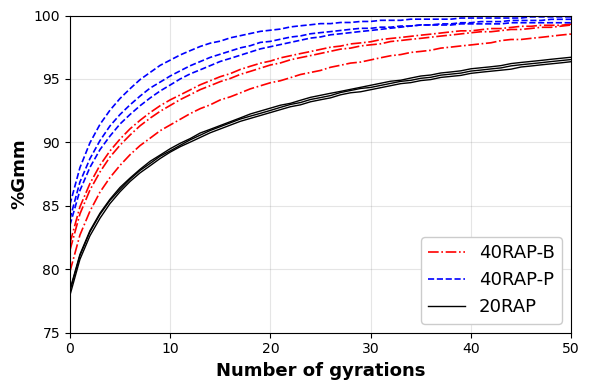

In [4]:
# Plot the %Gmm as a function of number of gyrations. 
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(Comp['NumGyration'], Comp['40RAP-B,Rep1'], color='r', ls='-.', lw=1.2, label='40RAP-B')
ax.plot(Comp['NumGyration'], Comp['40RAP-B,Rep2'], color='r', ls='-.', lw=1.2)
ax.plot(Comp['NumGyration'], Comp['40RAP-B,Rep3'], color='r', ls='-.', lw=1.2)

ax.plot(Comp['NumGyration'], Comp['40RAP-P,Rep1'], color='b', ls='--', lw=1.2, label='40RAP-P')
ax.plot(Comp['NumGyration'], Comp['40RAP-P,Rep2'], color='b', ls='--', lw=1.2)
ax.plot(Comp['NumGyration'], Comp['40RAP-P,Rep3'], color='b', ls='--', lw=1.2)

ax.plot(Comp['NumGyration'], Comp['20RAP,Rep1'], color='k', ls='-', lw=1, label='20RAP')
ax.plot(Comp['NumGyration'], Comp['20RAP,Rep2'], color='k', ls='-', lw=1)
ax.plot(Comp['NumGyration'], Comp['20RAP,Rep3'], color='k', ls='-', lw=1)

ax.set_xlim([0, 50])
ax.set_ylim([75, 100])
ax.grid(which='both', color='gray', alpha=0.2)
ax.legend(fontsize=13, framealpha=1.0)
ax.set_xlabel('Number of gyrations', fontsize=13, fontweight='bold', color='k')
ax.set_ylabel('%Gmm', fontsize=13, fontweight='bold', color='k')

fig.tight_layout()
# fig.savefig('../_Figures/Figure02_Gyratory_CompactionCurves.png', format='png', dpi=1000)
# fig.savefig('../_Figures/Figure02_Gyratory_CompactionCurves.pdf', format='pdf')
# fig.savefig('../_Figures/Figure02_Gyratory_CompactionCurves.svg', format='svg')

_______

## Plot 03: Aggregate gradation. 

Read the raw gradation data from the `Data.xlsx` file and calculate the power 0.45 of the sieve sizes for plotting the gradation curves. 

In [5]:
# Plot the results. 
Gradation = pd.read_excel(MainDataFile, sheet_name='Gradation Curves', skiprows=1, usecols='A:H',
                          names=['SieveSize_in', 'SieveSize_mm', '40RAP-B', '40RAP-P', '20RAP', 'Target', 
                                 'Control_Min', 'Control_Max'])
# Calculate the 0.45 power values. 
Gradation['Power_0.45']  = Gradation['SieveSize_mm']  ** 0.45
Gradation

,SieveSize_in,SieveSize_mm,40RAP-B,40RAP-P,20RAP,Target,Control_Min,Control_Max,Power_0.45
0,2 inches,50.000,100.000000,100.000000,100.000000,100.0,NaN,NaN,5.814823
1,1 1/2 inches,37.500,100.000000,100.000000,100.000000,100.0,NaN,NaN,5.108743
2,1 inch,25.000,100.000000,100.000000,100.000000,100.0,NaN,NaN,4.256700
3,3/4 inch,19.000,100.000000,100.000000,99.800000,100.0,NaN,NaN,3.762176
4,1/2 inch,12.500,99.166667,99.333333,99.366667,99.0,95.0,100.0,3.116087
5,3/8 inch,9.500,88.133333,92.100000,91.200000,91.0,NaN,90.0,2.754074
6,No. 4,4.750,54.300000,62.800000,61.100000,64.0,58.0,80.0,2.016100
7,No. 8,2.360,36.533333,43.366667,37.366667,40.0,34.0,50.0,1.471670
8,No. 30,0.600,20.533333,23.766667,17.600000,20.0,NaN,23.0,0.794636
9,No. 50,0.300,14.900000,16.966667,13.366667,15.0,NaN,NaN,0.581707


Plot the gradation curves and control intervals.

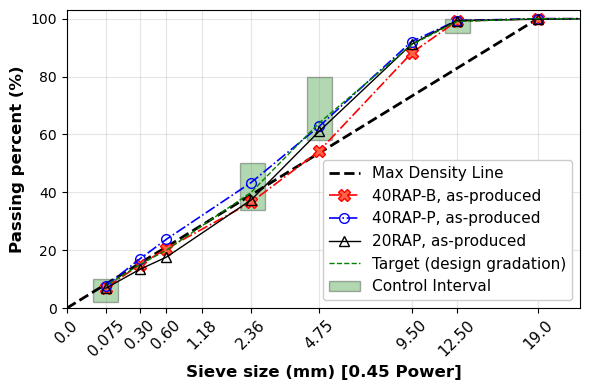

In [6]:
# Plot the results. 
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot([0, 19 ** 0.45], [0, 100], ls='--', lw=2, color='k', label='Max Density Line')
ax.plot(Gradation['Power_0.45'], Gradation['40RAP-B'], ls='-.', lw=1.2, color='r', marker='X', ms=8, markerfacecolor='tomato', label='40RAP-B, as-produced')
ax.plot(Gradation['Power_0.45'], Gradation['40RAP-P'], ls='-.', lw=1.2, color='b', marker='o', ms=7, markerfacecolor='none', label='40RAP-P, as-produced')
ax.plot(Gradation['Power_0.45'], Gradation['20RAP'],   ls='-',  lw=1.0, color='k', marker='^', ms=7, markerfacecolor='none', label='20RAP, as-produced')
ax.plot(Gradation['Power_0.45'], Gradation['Target'],  ls='--',  lw=1.0, color='g', marker='', ms=7, markerfacecolor='none', label='Target (design gradation)')
# Add the control highlights. 
ax.add_patch(patches.Rectangle((11.7 ** 0.45, 95), 0.2, 5, edgecolor='k',  facecolor='g', alpha=0.3, linewidth=1, linestyle='-', label='Control Interval'))
ax.add_patch(patches.Rectangle((4.25 ** 0.45, 58), 0.2, 22, edgecolor='k', facecolor='g', alpha=0.3, linewidth=1, linestyle='-'))
ax.add_patch(patches.Rectangle((2.06 ** 0.45, 34), 0.2, 16, edgecolor='k', facecolor='g', alpha=0.3, linewidth=1, linestyle='-'))
ax.add_patch(patches.Rectangle((0.03 ** 0.45, 2),  0.2, 8,  edgecolor='k', facecolor='g', alpha=0.3, linewidth=1, linestyle='-'))
# Fix the x-axis ticks. 
SieveSizes = np.array([0, 0.075, 0.30, 0.60, 1.18, 2.36, 4.75, 9.50, 12.50, 19.0])
ax.set_xticks(list(SieveSizes ** 0.45))
ax.set_xticklabels(['0.0', '0.075', '0.30', '0.60', '1.18', '2.36', '4.75', '9.50', '12.50', '19.0'], rotation=45, fontsize=11)
ax.set_xlim([0, 23 ** 0.45])
ax.set_ylim([0, 103])
ax.set_xlabel('Sieve size (mm) [0.45 Power]', fontsize=12, fontweight='bold', color='k')
ax.set_ylabel('Passing percent (%)', fontsize=12, fontweight='bold', color='k')
ax.grid(which='both', color='gray', alpha=0.2)
ax.legend(fontsize=11, framealpha=1.0, fancybox=True, loc='lower right')
fig.tight_layout()
# fig.savefig('../_Figures/Figure03_Aggregate_Gradation.png', format='png', dpi=1000)
# fig.savefig('../_Figures/Figure03_Aggregate_Gradation.pdf', format='pdf')
# fig.savefig('../_Figures/Figure03_Aggregate_Gradation.svg', format='svg')